# MACHINE LEARNING

In [3]:
# IMPORTING PACKAGES FOR NUMPY AND PLOTTING

import numpy as np
import matplotlib.pyplot as plot

In [4]:
# PROVIDING INITIAL DATA TO USE IN PREDICTION AND THE LINEAR EQUATION WE WILL USE

x = np.array([85,60,30,40,30,40,20,90,60,80,50,70])
y = np.array([9,8,2,7,4,3,5,10,5,7,4,6])

yfx = (x/8) + 1

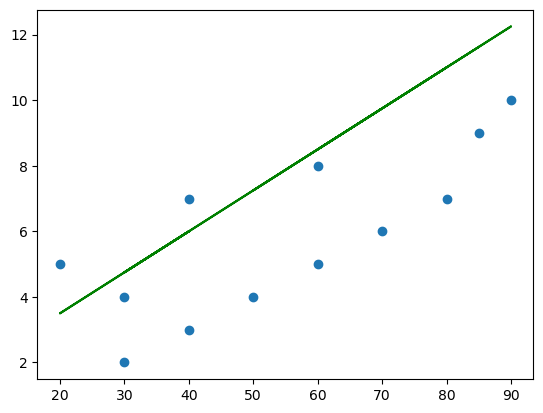

In [5]:
# PLOTTING THE GRAPH WITH INITIAL DATA

plot.scatter(x,y)
plot.plot(x, yfx, color="green")

In [6]:
# IMPORTING SKLEAN CLASSES FOR METRICTS (TO FIND MSE AND R2 SCORE)

from sklearn.metrics import r2_score, mean_squared_error

In [7]:
# FINDING R2 SCORE FOR OUR INITIAL DATA

print(r2_score(y,yfx))

-0.30131662436548234


In [8]:
# IMPORTING DATASETS AND PANDA

from sklearn import datasets
import pandas as pd

In [9]:
# READING DATA FROM CSV FILE

salary_data = pd.read_csv('/home/yt-achille/Desktop/learning-python-repo/Salary_Data_2.csv')
salary_data.head(5)

,Gender,YearsExperience,Salary
0,1,1.1,39343
1,0,1.3,46205
2,0,1.5,37731
3,1,2.0,43525
4,1,2.2,39891


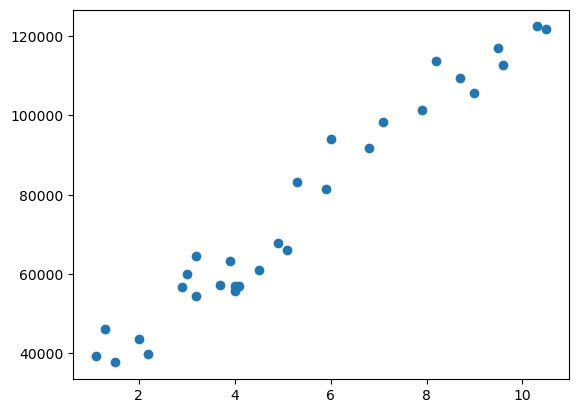

In [36]:
# PUT SALARY DATA ON THE GRAPH

plot.scatter(x = salary_data['YearsExperience'], y = salary_data['Salary'])

In [12]:
print('The shape of the dataset: ', salary_data.shape)
print('Number of columns: ', salary_data.columns)
print('Description of the dataset: ', salary_data.describe())
print('\nNull values in the dataset: ', salary_data.isna().sum())

The shape of the dataset:  (30, 3)
Number of columns:  Index(['Gender', 'YearsExperience', 'Salary'], dtype='object')
Description of the dataset:            Gender  YearsExperience         Salary
count  30.000000        30.000000      30.000000
mean    0.433333         5.313333   76003.000000
std     0.504007         2.837888   27414.429785
min     0.000000         1.100000   37731.000000
25%     0.000000         3.200000   56720.750000
50%     0.000000         4.700000   65237.000000
75%     1.000000         7.700000  100544.750000
max     1.000000        10.500000  122391.000000

Null values in the dataset:  Gender             0
YearsExperience    0
Salary             0
dtype: int64


In [10]:
training_size = 0.7
test_size = 0.3

obs,c = salary_data.shape
train_obs = int(obs * training_size)
test_obs = int(obs * test_size)

In [11]:
training_data = salary_data[0:train_obs]
test_data = salary_data[train_obs:]

In [12]:
test_data.columns

Index(['Gender', 'YearsExperience', 'Salary'], dtype='object')

In [13]:
x_train = pd.DataFrame(training_data['YearsExperience'])
y_train = training_data['Salary']

x_test = pd.DataFrame(test_data['YearsExperience'])
y_test = test_data['Salary']

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
linear_model = LinearRegression()

my_model = linear_model.fit(x_train, y_train)

print("Coefficient is: ", my_model.coef_)
print("Intercept is: ", my_model.intercept_)

Coefficient is:  [9306.90339631]
Intercept is:  26014.304430949167


In [16]:
y_test_prediction = my_model.predict(x_test)

print("MSE in testing is: ", mean_squared_error(y_test_prediction, y_test))
print("R2 Score in testing is: ", r2_score(y_test_prediction, y_test))

MSE in testing is:  23812335.76688826
R2 Score in testing is:  0.7549222570630553


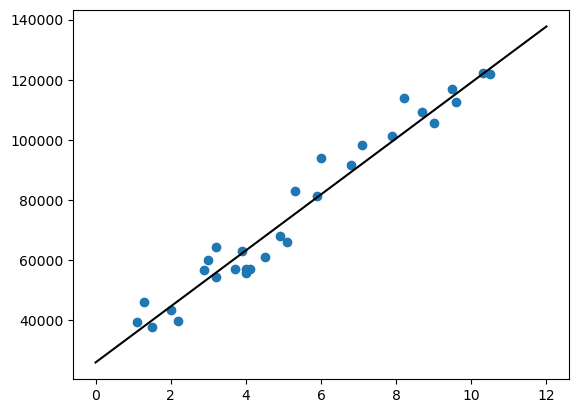

In [27]:
A = my_model.coef_[0]
B = my_model.intercept_

x = np.arange(13)
y = A*x + B

plot.scatter(x = salary_data['YearsExperience'], y = salary_data['Salary'])
plot.plot(x, y, color = 'black')

In [17]:
male = []
female = []

for i in range(len(salary_data['Gender'])):
    if salary_data['Gender'][i] == 1:
        male.append(1)
        female.append(0)
    if salary_data['Gender'][i] == 0:
        male.append(0)
        female.append(1)
        


In [35]:
male = pd.DataFrame(male)
female = pd.DataFrame(female)

modified_data = pd.concat([salary_data, male, female], axis = 1)
modified_data.columns = ['Gender', 'YearsExperience', 'Salary', 'Male', 'Female']

DataFrameModel = modified_data[['Male', 'Female', 'YearsExperience', 'Salary']]

DataFrameModel.head(10)

,Male,Female,YearsExperience,Salary
0,1,0,1.1,39343
1,0,1,1.3,46205
2,0,1,1.5,37731
3,1,0,2.0,43525
4,1,0,2.2,39891
5,0,1,2.9,56642
6,0,1,3.0,60150
7,1,0,3.2,54445
8,0,1,3.2,64445
9,1,0,3.7,57189


In [40]:
# training_data = salary_data[0:train_obs]
# test_data = salary_data[train_obs:]

# x_test = pd.DataFrame(test_data['YearsExperience'])
# y_test = test_data['Salary']

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size = 0.7, random_state = 17)

In [52]:
linearModelTwo = LinearRegression();

NewModel = linearModelTwo.fit(x_train, y_train)

print("My coefficient is: ", NewModel.coef_)
print("The intercept is: ", NewModel.intercept_)

My coefficient is:  [-2491.6140917   2491.6140917   9262.14602752]
The intercept is:  25262.89968620192


In [53]:
TestPrediction = NewModel.predict(x_train)

print("MSE in testing is: ", mean_squared_error(TestPrediction, y_train))
print("R2 Score in testing is: ", r2_score(TestPrediction, y_train))

MSE in testing is:  19406856.277003884
R2 Score in testing is:  0.9713825624156145
